In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
df = pd.read_csv(r"C:\Users\bhavi\Downloads\SMSR\Machine Learning\Credit_card_fraud_detection_linear\Cred_card_fraud\card_transdata.csv")

In [4]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
print(df.fraud.value_counts())

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [9]:
df = pd.concat([
    df[df.fraud == 1],
    df[df.fraud == 0].sample(n = 87403)
])

In [10]:
df.fraud.value_counts()

fraud
1.0    87403
0.0    87403
Name: count, dtype: int64

In [12]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [16]:
df["fraud"] = df["fraud"].astype(int)

In [17]:
x = df.drop(["fraud"], axis = 1)
y = df["fraud"]

In [18]:
print(x)

        distance_from_home  distance_from_last_transaction  \
13                2.131956                       56.372401   
24                3.803057                       67.241081   
29               15.694986                      175.989182   
35               26.711462                        1.552008   
36               10.664474                        1.565769   
...                    ...                             ...   
32478             1.869925                       45.428037   
755735           21.823085                        0.232695   
385832            0.333367                        0.129999   
903773            4.987482                        3.272580   
526575           17.778339                        0.229017   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
13                            6.358667              1.0        0.0   
24                            1.872950              1.0        0.0   
29                            0.855623       

In [19]:
print(y)

13        1
24        1
29        1
35        1
36        1
         ..
32478     0
755735    0
385832    0
903773    0
526575    0
Name: fraud, Length: 174806, dtype: int32


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [21]:
print(x_test)

        distance_from_home  distance_from_last_transaction  \
433234            5.325103                       21.034465   
916471           13.870957                        0.751479   
694116           73.106238                        4.903754   
861178           13.851810                        1.847227   
870355           27.168757                        1.466571   
...                    ...                             ...   
369863           22.147759                        0.525306   
738687            2.317880                        1.929876   
220473            6.377319                      133.014019   
514557            1.957938                        6.863179   
441924          141.866236                        7.009412   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
433234                        4.555176              1.0        1.0   
916471                        0.779570              1.0        0.0   
694116                       30.891568       

In [22]:
print(y_test)

433234    1
916471    0
694116    1
861178    0
870355    0
         ..
369863    1
738687    0
220473    1
514557    0
441924    1
Name: fraud, Length: 34962, dtype: int32


In [23]:
print(x_train)

        distance_from_home  distance_from_last_transaction  \
757266           35.114515                        0.253669   
852779           39.754248                      104.286998   
287904          270.873369                        0.143073   
149872            2.337403                        0.182744   
488618            4.381366                       44.811842   
...                    ...                             ...   
965803            5.953549                      148.875208   
131517            4.072045                        0.702330   
322397           18.812775                        0.962353   
799053           11.866361                        4.179750   
195703            4.725282                        0.259215   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
757266                        0.542865              1.0        0.0   
852779                        2.742688              1.0        0.0   
287904                        0.806332       

In [24]:
print(y_train)

757266    0
852779    1
287904    1
149872    0
488618    0
         ..
965803    1
131517    0
322397    0
799053    0
195703    0
Name: fraud, Length: 139844, dtype: int32


In [25]:
log_reg_model = LogisticRegression()

In [26]:
log_reg_model.fit(x_train, y_train)

C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
log_train_model = log_reg_model.predict(x_train)

In [30]:
log_reg_model.score(x_train, y_train)*100

94.04050227396242

<Axes: xlabel='fraud'>

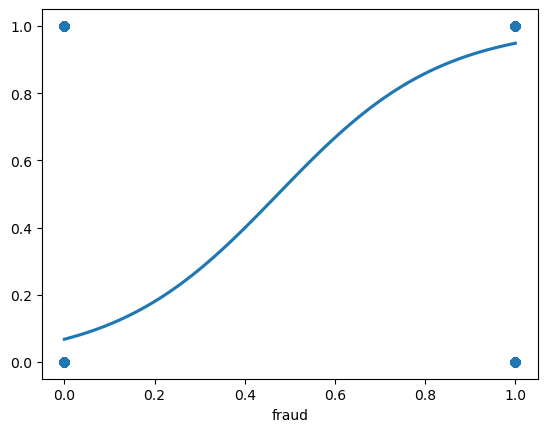

In [31]:
sns.regplot(x = y_train, y = log_train_model, logistic = True, ci = None)


In [32]:
log_test_model = log_reg_model.predict(x_test)

In [34]:
log_reg_model.score(x_test, y_test)*100

94.08500657857101

<Axes: xlabel='fraud'>

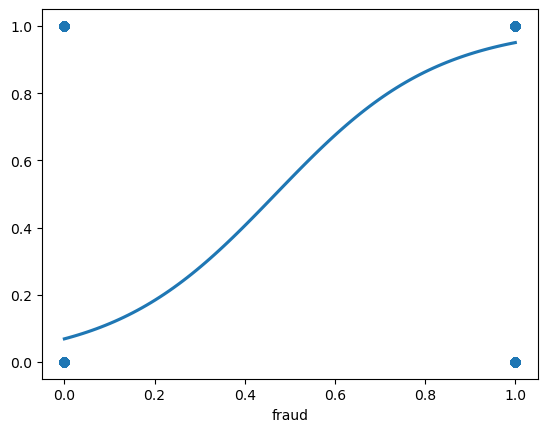

In [35]:
sns.regplot(x = y_test, y = log_test_model, logistic = True, ci = None)


In [36]:
print(y_test)

433234    1
916471    0
694116    1
861178    0
870355    0
         ..
369863    1
738687    0
220473    1
514557    0
441924    1
Name: fraud, Length: 34962, dtype: int32


In [40]:
line = 514557

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = log_reg_model.predict([a])

print("List of arguments:                               ",a)
print("Actual Amount:                                   ",b)

print("Model Prediction Amount:                         ",a1)

print("Difference Between Actual and Prediction:        ",a1 - b)

List of arguments:                                [1.957938145948961, 6.863179240311317, 0.9889998239418551, 1.0, 1.0, 0.0, 1.0]
Actual Amount:                                    0
Model Prediction Amount:                          [0]
Difference Between Actual and Prediction:         [0]


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
saved_model = pickle.dumps(log_reg_model)
FraudDetection_from_pickle = pickle.loads(saved_model)
FraudDetection_from_pickle.predict(x_test)

array([1, 0, 1, ..., 1, 0, 1])

In [42]:
pickle.dump(log_reg_model, open("CreditCardFraud.pkl", "wb"))

In [43]:
pickle_model = pickle.load(open("CreditCardFraud.pkl", "rb"))

In [44]:
y_test

433234    1
916471    0
694116    1
861178    0
870355    0
         ..
369863    1
738687    0
220473    1
514557    0
441924    1
Name: fraud, Length: 34962, dtype: int32

In [46]:
line = 433234

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = pickle_model.predict([a])

print("List of arguments:                               ",a)
print("Actual Amount:                                   ",b)

print("Model Prediction Amount:                         ",a1)

print("Difference Between Actual and Prediction:        ",a1 - b)

List of arguments:                                [5.325102866189466, 21.034464994644065, 4.555176284352117, 1.0, 1.0, 0.0, 1.0]
Actual Amount:                                    1
Model Prediction Amount:                          [1]
Difference Between Actual and Prediction:         [0]


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
